I also included the examples they did for the ethane; my work on the problems they did is further down and interspersed within their demonstrations.

In [2]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit
import mdtraj as md

In [8]:
pdb = app.PDBFile('ethane.pdb')
forcefield = app.ForceField('ethane.gaff2.xml')

In [9]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)

In [10]:
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)

In [11]:
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [12]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 4.467818224810637 kJ/mol
Potential energy after minimization is 4.38996767892269 kJ/mol


In [13]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 100, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,20.996158902065172,215.75454430663342
200,14.95037030838941,161.4523084455269
300,15.877800735667154,187.95318391942243
400,18.530906551570087,322.32955434903687
500,13.506618570049294,287.5134219216384
600,23.89899550600591,502.6586553058878
700,11.798407613577481,243.60697958489766
800,18.793125480901825,277.66701280760236
900,14.073777218964302,303.69983497769783
1000,24.149453086569537,261.42258429219095
1100,16.52008975245457,393.3488052041034
1200,22.817911055064805,206.80458529112883
1300,17.855782678030778,314.7067159738747
1400,18.16105412633824,529.1741832763523
1500,13.556943397393237,151.37370125512396
1600,21.800269857873108,440.75207065620907
1700,15.33493845349922,460.90411945561647
1800,16.781354751501727,388.2834674792999
1900,24.575618376302533,402.46127504470695
2000,28.521719149079196,304.34847852954266
2100,25.266782613999137,467.01434538153933
2200,22.756200105568844,280.61926412024616
230

In [14]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('ethane_sim.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,15.705684402130771,322.59255936374103,0
500000,999.9999999901769,14.255835473100351,188.3267053930908,1.82e+04
750000,1499.9999999783536,15.264551722002,270.7830772656255,1.53e+04
1000000,1999.9999999665301,22.397390962331404,429.9713221170797,1.44e+04
1250000,2499.9999999547067,21.972469858430408,194.792894611874,1.39e+04
1500000,2999.9999999428833,28.50487631032455,397.31829410917953,1.36e+04
1750000,3499.99999993106,14.613177383981386,255.8403021682671,1.39e+04
2000000,3999.9999999192364,30.313251366888295,155.04980458699993,1.38e+04
2250000,4499.9999999992715,25.189981458516968,126.97925213605727,1.39e+04
2500000,5000.000000101135,22.994352947683105,374.9726474198469,1.38e+04
2750000,5500.000000202998,18.512320903936295,367.152883535531,1.36e+04
3000000,6000.000000304862,34.36738340192347,515.975190492492,1.38e+04
3250000,6500.000000406725,33.0936944299

In [16]:
pdb = app.PDBFile('butane.pdb')
forcefield = app.ForceField('butane.gaff2.xml')

In [17]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)

In [18]:
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)

In [19]:
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [20]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.796706828459597 kJ/mol
Potential energy after minimization is 5.298273937266501 kJ/mol


In [21]:
from sys import stdout

print('Equilibrating...')

#The websote notes that each step is 2 femtoseconds long.
#1000 femtoseconds = 1 picosecond, so I changed the step cound=ts accordingly.
simulation.reporters.append(app.StateDataReporter(stdout, 250, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
#The previous equilibration took 5000 femtoseconds = 5 picoseconds.
#Therefore, multiply by 2.
simulation.step(2500*2)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
250,54.397208766048735,237.58858837075553
500,33.4017271077675,354.64466626315715
750,35.392403537695316,598.5389519253213
1000,45.381544432540856,384.62079350736946
1250,56.53039441215425,495.72763718767203
1500,40.22523176941356,368.1152914525541
1750,39.87960731905436,180.88556540152234
2000,34.878926663121206,292.92340538487133
2250,40.29271146444542,260.95681517250335
2500,33.40472748642584,360.68578050323254
2750,40.04945679059906,256.3929793208351
3000,39.38610149033979,251.63733258417952
3250,53.67783725894857,320.63773000705334
3500,45.60602104700727,342.08244876498026
3750,53.21097983709036,350.92384629761165
4000,41.2721947485884,170.28381096359956
4250,43.18461554433611,258.36215870394705
4500,33.23473574360327,143.4855833991558
4750,45.97591096538064,277.05543205277417
5000,47.18343468253582,296.0100141708387


In [22]:
print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 2*250000 steps - (which is equal to 2*2 fs(250,000) = 2*500,000 fs = 2*500 ps)
# = 1 ns
simulation.reporters.append(app.StateDataReporter(stdout, 2*250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps. This time, write to butane's file.
simulation.reporters.append(app.DCDReporter('butane_sim.dcd', 100))

# run the simulation for 2*1.0x10^7 steps - 2*20 ns = 40 ns
simulation.step(2*10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
500000,999.9999999901769,49.51461367540766,315.79723443306204,--
1000000,1999.9999999665301,46.53326228558774,250.94753975811935,6.72e+03
1500000,2999.9999999428833,38.204121007133665,130.30446475219108,6.84e+03
2000000,3999.9999999192364,47.13049461752717,268.8892100163739,6.94e+03
2500000,5000.000000101135,37.10114308500187,191.7462074058089,7e+03
3000000,6000.000000304862,41.77738620400497,269.7954999348099,7.01e+03
3500000,7000.0000005085885,36.317161972337765,307.5995881106668,6.97e+03
4000000,8000.000000712315,42.5369796530264,331.57731429347467,6.99e+03
4500000,9000.000000916041,40.15647437483511,537.362927386963,6.99e+03
5000000,10000.000001119768,34.14893256769438,310.6304238278244,6.98e+03
5500000,11000.000001323495,61.26465617198138,335.34773047445725,6.96e+03
6000000,12000.000001527222,37.82016384456765,390.87163354318415,7e+03
6500000,13000.000001730948,34.698071835770

In [3]:
#print(workDir+'butane_sim.dcd')
#simulation.reporters.append(app.DCDReporter(workDir+'butane_sim.dcd', 100))
traj = md.load('butane_sim.dcd', top='butane.pdb')
traj
#traj.superpose(ref)

<mdtraj.Trajectory with 10000 frames, 14 atoms, 1 residues, without unitcells at 0x2e08433fd30>

In [5]:
#jupyter-nbextension enable --py --user nglview
#jupyter-nbextension enable --py --user widgetsnbextension 

import ipywidgets
from ipywidgets import interact, fixed
import warnings
import nglview as ngl
from nglview.player import TrajectoryPlayer
traj = md.load('butane_sim.dcd', top='butane.pdb')
t = ngl.MDTrajTrajectory(traj)
w = ngl.NGLWidget(t)
w

NGLWidget(max_frame=9999)

In [6]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [7]:
top=traj.topology
top

#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


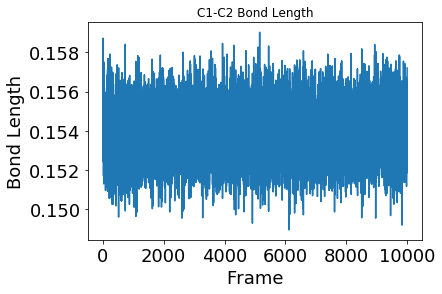

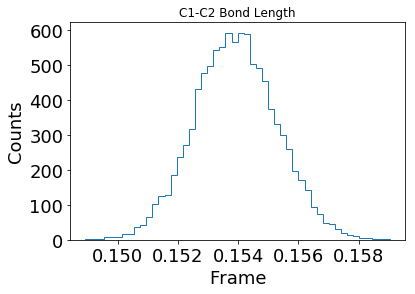

In [20]:
import matplotlib.pyplot as plt
#Compute Some Distances and plot the time course - Bond 0-4
bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])
bond_indices = [4, 7]
C2C3bondlength = md.compute_distances(traj, [bond_indices])
bond_indices = [7, 10]
C3C4bondlength = md.compute_distances(traj, [bond_indices])

plt.plot(C1C2bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C1-C2 Bond Length')

plt.show()
plt.clf()

plt.hist(C1C2bondlength,bins=50,histtype='step')
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Counts', size=18)
plt.title('C1-C2 Bond Length')
plt.show()

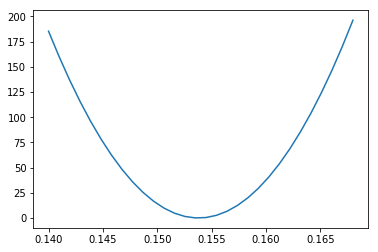

In [21]:
import numpy as np
bondlengths=np.linspace(0.140,0.168,30)

#array bond lenghts
def harmonic_bond_E(k,b,b0):
    return k/2*(b-b0)**2

Bond_E=harmonic_bond_E(1945727.27,bondlengths,0.15380)

plt.plot(bondlengths,Bond_E)

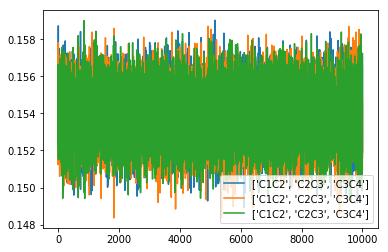

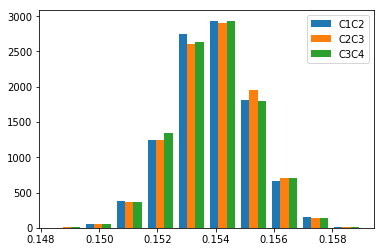

In [34]:
bond_indices = [[0, 4],[4, 7],[7, 10]]
CC_bondlengths = md.compute_distances(traj, bond_indices)

C1C2_bond=np.shape(CC_bondlengths[:,0])
C2C3_bond=np.shape(CC_bondlengths[:,1])
C3C4_bond=np.shape(CC_bondlengths[:,2])

plt.plot(CC_bondlengths,label=['C1C2','C2C3','C3C4'])
plt.legend()
plt.show()
plt.clf()

plt.hist(CC_bondlengths,label=['C1C2','C2C3','C3C4'])
plt.legend()

In [35]:
#Compute Some Distances and plot the time course - Bond 0-4

#bond_indices = [4, 7] 
#See above

In [36]:
#Compute Some Distances and plot the time course - Bond 0-4
#bond_indices = [7, 10] 
#See above

In [37]:
#Plot Histograms of Each Bond Length
#See above

In [41]:
######Class Activtiy: Calculate the Variance and Standard Deviation of Each Bond Length######
bond_indices = [[0, 4],[4, 7],[7, 10]]
CC_bondlengths = md.compute_distances(traj, bond_indices)

C1C2_bond=CC_bondlengths[:,0]
C2C3_bond=CC_bondlengths[:,1]
C3C4_bond=CC_bondlengths[:,2]
ave=np.average(C1C2_bond)
var=np.var(C1C2_bond)
std=np.std(C1C2_bond)

print("Average:",ave,"Variance",var,"STD",std)

Average: 0.15391365 Variance 1.877708e-06 STD 0.0013702948


In [42]:
###SOLUTION###
bond_indices = [[0, 4],[4, 7],[7, 10]]
CC_bondlengths = md.compute_distances(traj, bond_indices)

C1C2_bond=CC_bondlengths[:,0]
C2C3_bond=CC_bondlengths[:,1]
C3C4_bond=CC_bondlengths[:,2]
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std


C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)
print("C1-C2 var:",C1C2var,"C2-C3 var:",C2C3var,"C3-C4 var:",C3C4var)
print("C1-C2 std:",C1C2std,"C2-C3 std:",C2C3std,"C3-C4 std:",C3C4std)

C1-C2 var: 1.877708e-06 C2-C3 var: 1.9097258e-06 C3-C4 var: 1.9028457e-06
C1-C2 std: 0.001370294848967931 C2-C3 std: 0.0013819282993662366 C3-C4 std: 0.0013794367417696333


In [43]:
#Lets Check Our Answers with the Built In Numpy Libraries np.var and np.std
bond_indices = [[0, 4],[4, 7],[7, 10]]
CC_bondlengths = md.compute_distances(traj, bond_indices)

C1C2_bond=CC_bondlengths[:,0]
C2C3_bond=CC_bondlengths[:,1]
C3C4_bond=CC_bondlengths[:,2]
C1C2_bond

array([0.15287682, 0.15568542, 0.15453506, ..., 0.15185185, 0.15249361,
       0.15720606], dtype=float32)

R2: -0.07686206044416956
Line Parameters: [-0.0775146   0.16587652]


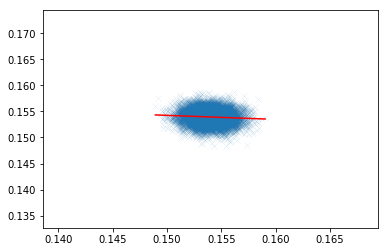

Line Parameters: [0.00388825 0.15330362]


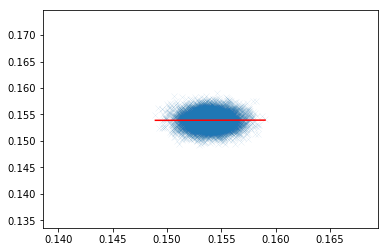

R2: 0.003862477153771339


<Figure size 432x288 with 0 Axes>

In [44]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

#plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',linewidth=0.05)
#######SOLUTION###########

plt.scatter(C1C2_bond,C2C3_bond,marker='x',linewidth=.05)

r2=np.corrcoef(C1C2_bond,C2C3_bond)[0,1]
print("R2:",r2)

line_fit=np.polyfit(C1C2_bond,C2C3_bond,1)
x = np.linspace(min(C1C2_bond), max(C1C2_bond),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

plt.scatter(C1C2_bond,C3C4_bond,marker='x',linewidth=.05)
x = np.linspace(min(C1C2_bond), max(C1C2_bond),20)
line_fit=np.polyfit(C1C2_bond,C3C4_bond,1)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r2=np.corrcoef(C1C2_bond,C3C4_bond)[0,1]

print("R2:",r2)

C:\Users\leman\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


a: 1.0 x0: 1.0 fit_sigma: 1.0


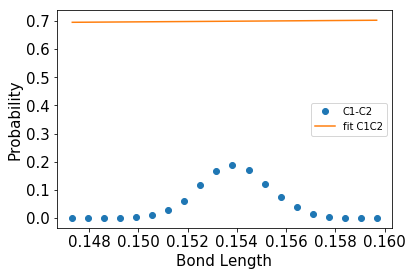

In [47]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2_bond, bins=20, range=[0.147,0.160])
centers = edges[:-1] + np.diff(edges)/2
density=counts/np.sum(counts)

###Now we define a gaussian function that we'll fit to our probability densities

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers


def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 




C1C2_density,centers=histogram_bincenters(C1C2_bond,0.147,0.160,20)

C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

plt.plot(centers, C1C2_density, 'o', label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')

plt.legend()
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#Can you write a function to calculate the histogram, return the density and centers,
#and then fit a guassian to each of these distributions? 

####SOLUTION####

In [ ]:
#ADD CODE FOR CDFs HERE#

In [ ]:
#ADD CODE FOR Random Samples here#
#Draw 10,100,1000 random samples of a bond angle,

#This function might be helpful:
rands=np.random.randint(10000, size=(10))
rands


In [ ]:
#Lets Compute Some Bond Angles 
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
#ang=np.degrees(angle_rad)

In [ ]:
####Challenge Question Can you estimate the lifetime of the higher energy C-C-C-C dihedral states####

In [ ]:
#Are the bond angle and dihedral correlated?
plt.scatter(dihe,ang1,marker='x',linewidth=0.01)
plt.scatter(dihe,ang2,marker='x',linewidth=0.01)

#plt.scatter(ang1[1:-1:10],ang2[1:-1:10])
#r=np.corrcoef(ang1, ang2)
#print("Angle Correlation r^2:",r[0,1])

In [ ]:
#Homework problem 3##

In [ ]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

In [ ]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets right a function that takes paramters from the xml and writes the force field term


In [ ]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

In [ ]:
#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

In [ ]:
####Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT OU SEE
#Consider CCCC vs. [8,7,4,5]


#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Consider CCCC vs. [12,10,7,9]


In [ ]:
#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT
#plt.scatter(CCCC_torsion,HCCH_torsions[:,1],marker='x',linewidth=0.04)
#diff=CCCC_torsion[:,0]-HCCH_torsions[:,3]

In [ ]:
#COMPUTE THE TOTAL TORSION FORCE FIELD ENERGY PER FRAME

#plt.scatter(CCCH_torsions[:,0],CCCH_E[:,0])


In [ ]:
#Compare the time course of CCCC torsion with its energy 
#Interpret what you are seeing in terms of conformations and energies



In [ ]:
#Solution


In [ ]:
###SOLUTION#####

In [ ]:
#RUN NEW MD SIMULATION HERE#

In [ ]:
#Calculate LJ and Couloumb Potentionals Here